# Spotify Classification Problem 
### Project by : Kaleemulla Adil Rahman


## Objective

The objective of the challenge is to build a **machine learning model** that is able to predict the **genre** of a song. Genre of a song is a categorical value and this problem statement is a **classification problem**. There are various possible **genres** that makes this a **multinomial classification problem**.

## Dataset

There are two files `CS98XClassificationTrain.csv` that contains the training dataset and `CS98XClassificationTest.csv` that contains the dataset for final testing.

## Dataset Description

The dataset is drawn from [this kaggle dataset](https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s.) with a few changes. The dataset is a collection of spotify songs with their **audio features** (tempo, energy, danceability etc.) The training dataset contains 15 columns that are described below:

- `Id` - an arbitrary unique track identifier
- `title` - track title
- `artist` - singer or band
- `year` - year of release (or re-release)
- `bpm` - beats per minute (tempo)
- `nrgy` - energy: the higher the value the more energetic
- `dnce` - danceability: the higher the value, the easier it is to dance to this song
- `dB` - loudness (dB): the higher the value, the louder the song
- `live` - liveness: the higher the value, the more likely the song is a live recording
- `val` - valence: the higher the value, the more positive mood for the song
- `dur` - duration: the length of the song
- `acous` - acousticness: the higher the value the more acoustic the song is
- `spch` - speechiness: the higher the value the more spoken word the song contains
- `pop` - popularity: the higher the value the more popular the song is
- `top genre` - genre of the track (and the target variable for this problem)

## Approach

As for any machine learning project, we will be following a series of steps to come up with the solution to our classification problem. 

- Data Analysis
- Data Preparation & Feature Engineering
    - Identifying Data distribution
    - Outlier detection
    - Feature selection
    - Preprocessing
        - Scaling
        - Train/Test split
- Model Selection
    - Basic models
- Model training & evaluation
- Ensemble learning
- Kaggle submissions & scores

## Required python libraries

- [Numpy](https://numpy.org/) - for numerical operations
- [Pandas](https://pandas.pydata.org/) - for loading, querying and manipulating datasets
- [Matplotlib (pyplot)](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) - for visual analysis
- [Seaborn](https://seaborn.pydata.org/) - for visual analysis
- [Scikit-Learn](https://scikit-learn.org/stable/) - for machine learning

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
# configure notebook-wide figure size for seaborn
sns.set(rc={'figure.figsize':(10,10)})
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the training dataset

To load the training data from `CS98XClassificationTrain.csv`, we will use `read_csv` function from pandas library. `read_csv` reads the excel and returns a `DataFrame` which resembles a **database table** or an **excel spreadsheet**. Once the data is loaded in `training_data` variable, we will check the shape of the `DataFrame` using `shape` property which displays 
```
(453, 15)
```
The dataset has _453_ rows and _15_ columns.
To view the first 10 rows from the loaded dataset, we use `head` function with an argument _10_

In [2]:
training_data = pd.read_csv("/kaggle/input/cs9856-spotify-classification-problem-2023/CS98XClassificationTrain.csv")
print(training_data.shape)
training_data.head(10)

(453, 15)


,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop
6,7,No Time,The Guess Who,1971,128,48,48,-14,5,12,219,8,6,44,album rock
7,8,End Of The Road,Boyz II Men,1991,150,43,64,-9,6,53,351,7,2,71,boy band
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
9,10,You Belong to My Heart,Timi Yuro,2013,108,39,46,-10,16,50,126,82,3,35,adult standards


## Data Analysis

Next, we perform a basic analysis of our training dataset. 
>`info` function describes the `DataFrame` technically indicating **type** and **nullability** of each feature. Except `title`, `artist` and `top genre`, all other features are numerical i.e.`int64`

>`describe` function statistically describes the `DataFrame` and displays Mean, Standard Deviation, and Five-Number summary of each numerical feature.

In [3]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,453.0,227.000000,130.914094,1.0,114.0,227.0,340.0,453.0
year,453.0,1991.443709,16.776103,1948.0,1976.0,1994.0,2007.0,2019.0
bpm,453.0,118.399558,25.238713,62.0,100.0,119.0,133.0,199.0
nrgy,453.0,60.070640,22.205284,7.0,43.0,63.0,78.0,100.0
dnce,453.0,59.565121,15.484458,18.0,49.0,61.0,70.0,96.0
dB,453.0,-8.836645,3.577187,-24.0,-11.0,-8.0,-6.0,-1.0
live,453.0,17.757174,13.830300,2.0,9.0,13.0,23.0,93.0
val,453.0,59.465784,24.539868,6.0,42.0,61.0,80.0,99.0
dur,453.0,226.278146,63.770380,98.0,181.0,223.0,262.0,511.0
acous,453.0,32.982340,29.530015,0.0,7.0,24.0,58.0,100.0


Now, let's take a look at `top genre` column. `top genre` is a categorical column with about `86` unique genres. Each genre is a class and we are dealing with a **multinomial** classification problem. The number of genres is very high and number of records are low which could mean that we might not have enough data per class.

Number of unique genres: 87


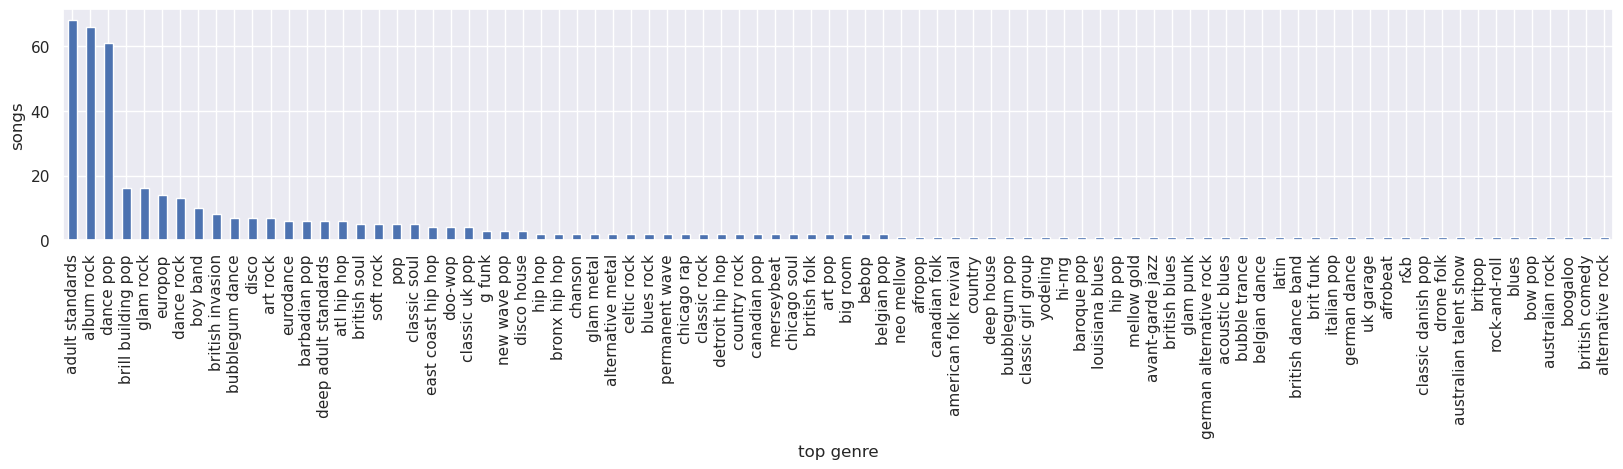

In [4]:
print('Number of unique genres: {}'.format(len(training_data['top genre'].unique())))
training_data['top genre'].value_counts().plot(kind='bar', figsize=(20,3), xlabel='top genre', ylabel='songs');

## Data Preparation & Feature Engineering

To understand the data better and find out the data distribution, we will use `histogram` plots. `histogram` plots will show us the data distribution and if any features are skewed. From the plots below, we can see that `live`, `acous` and `spch` columns are heavily skewed. This skewness can cause problems during _data selection_ for model training (using `train_test_split`). To solve this problem, we can either add another column to group the records better and then use this column for `train_test_split` or we can use `K-Fold` splitting to train our model.

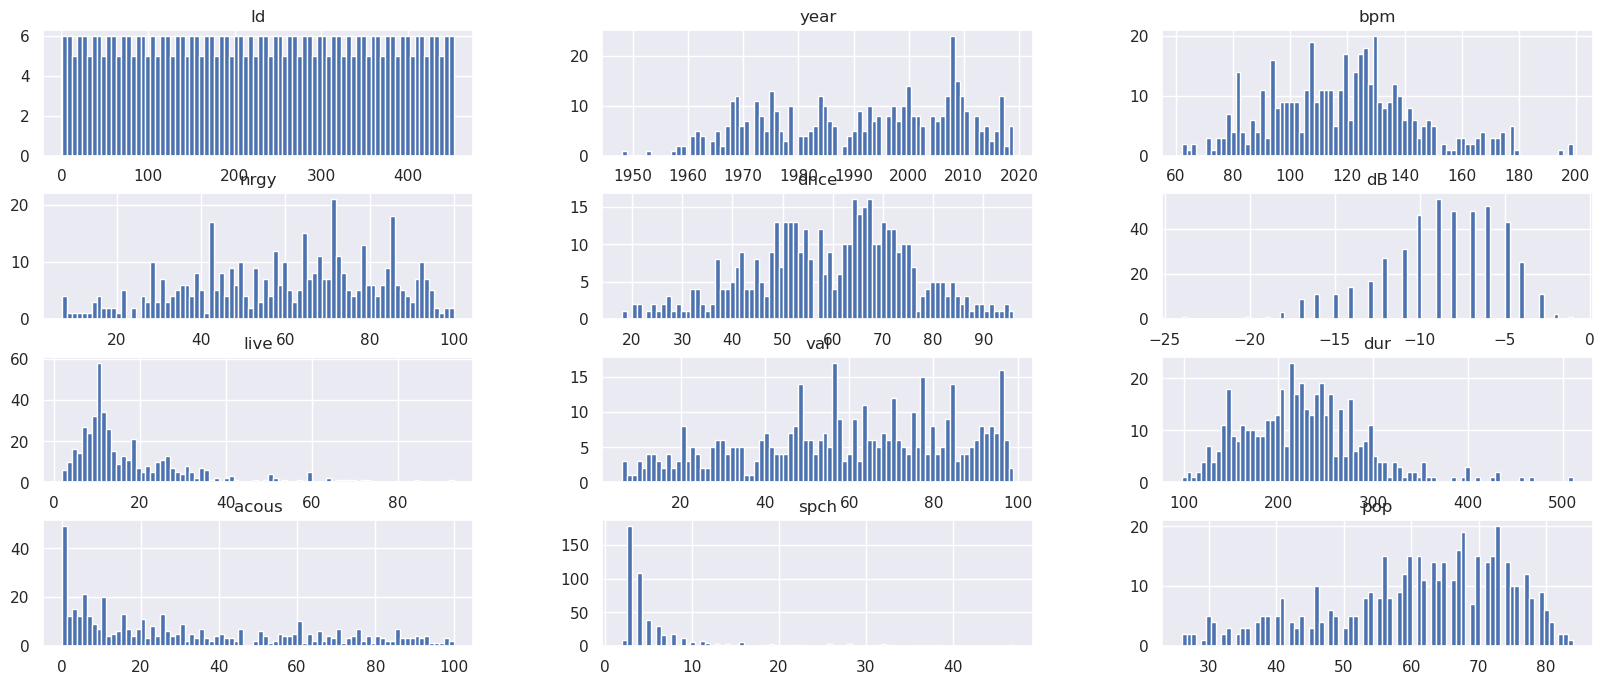

In [5]:
training_data.hist(bins=80, figsize=(20,8));

Next, we need to find if there are any `null` or **missing** values in our features. Records with `null` or **missing** values do not contribute much (or potentially contribute adversely) in model training.  If the number of records with missing values are low, we can remove them or else fill them with an appropriate value. From the output below, we can see that the only missing values are in `top genre` column. There are 15 rows with `null` or missing values in the entire dataset. This is a very low number (~3.3%) and we will remove them.

In [6]:
missing_values = training_data.isnull().sum()
print(missing_values[missing_values > 0])
print('Removing records with missing values...')
training_data = training_data[training_data['top genre'].isnull() == False]
print('Records with missing values: {}'.format(training_data.isnull().sum().sum()))

top genre    15
dtype: int64
Removing records with missing values...
Records with missing values: 0


Now, we have a dataset with no missing values. We will continue to investigate the dataset to find out two things
- Are there any outliers?
- Are the features correlated?

Before we proceed any futher, `title` and `artist` columns are not numerical and `Id` column has nothing to contribute to our model. So, we will drop these columns and continue with rest of the columns. To detect outliers, we will plot box plots for all the features. 

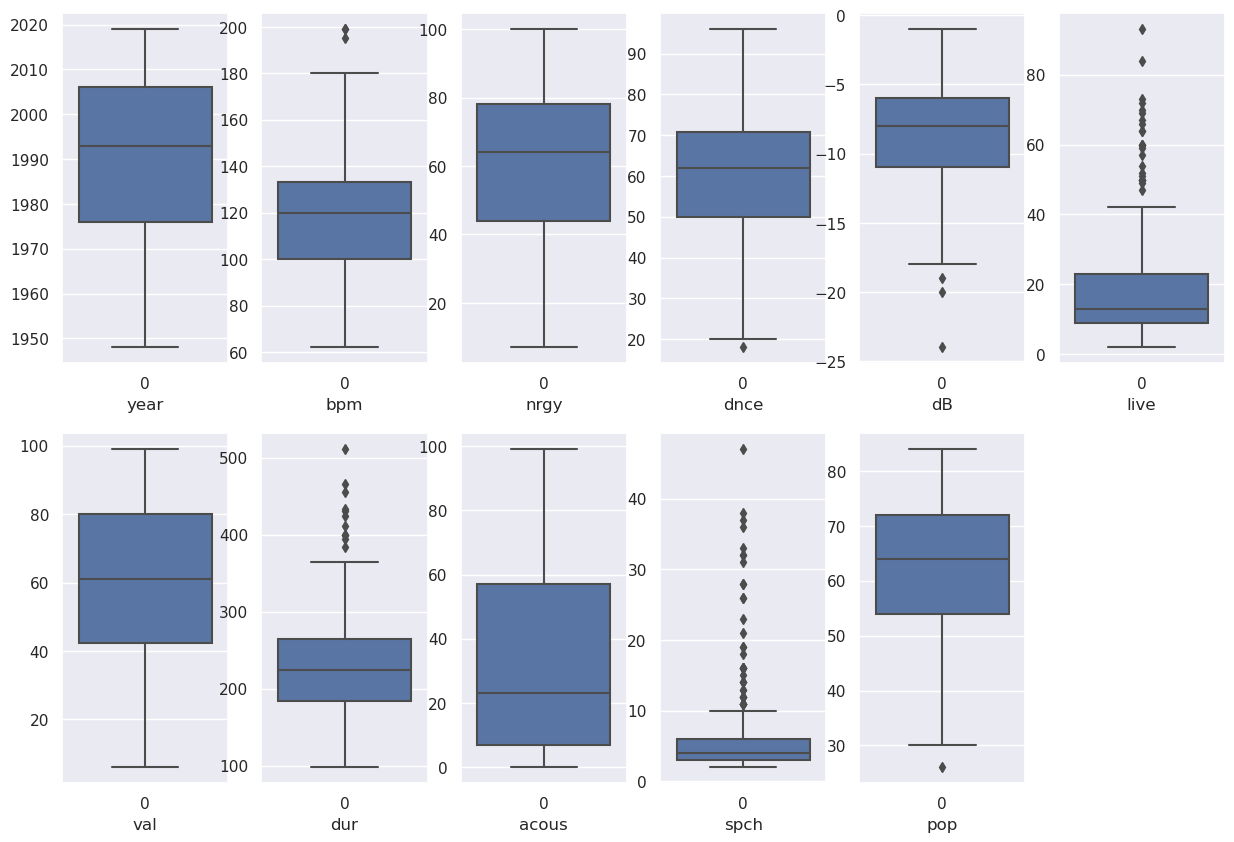

In [8]:
# create list of features
features = training_data.drop(['Id', 'title', 'artist', 'top genre'], axis = 1)
target = training_data['top genre']

# create a plot grid of 2x6
fig, axes = plt.subplots(2, 6, figsize=(15, 10))
grids = np.array(axes).flatten()
# remove the last axis as it's extra
grids[-1].remove()

# iterate through each feature and plot a boxplot using seaborn
for index, column in enumerate(features.columns):
    sns.boxplot(ax=grids[index], data = features[column]).set(xlabel=column)


From the plot above, we can see there are many outliers in `live`, `dur` and `spch` columns.
### Treating the outliers

Now that we are aware of many outliers in `live`, `dur` and `spch` columns, we will count the number of outliers. This is necessary to determine what should we do with outliers. If the outlier count is very low, we can choose to remove them.

To find the outliers, we will first calculate the **Quartiles** and find which values are beyond the 3 * interquartile range (IQR).

In [13]:
# calculate the quartiles and IQR (Inter-Quartile Range)
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# find the indices of rows with outliers, the indices will be used in next step to remove outliers
rows_with_outliers = features.index[((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]
print('{} Rows with outlier ({}%)'.format(len(rows_with_outliers), len(rows_with_outliers)/features.shape[0]))

# remove outliers using indices
features_no_outliers = features.drop(rows_with_outliers)
target_no_outliers = target.drop(rows_with_outliers)

74 Rows with outlier (0.1689497716894977%)


There are total **74** rows with outliers and that's a significant chunk of our dataset (~17%). We can't remove the outliers and so, we will train our models with and without outliers to see if that makes a difference.

Next, we will try to find if there are any coorelations between features. `pandas` provides an easy way to calculate the correlation score between features using `corr` function. We then can use `heatmap` from `seaborn` to plot this coorelation. Correlation values range between `-1` and `+1` where `-1` indicates **perfectly linear negative coorelation (inverse)** and `+1` indicates **perfectly linear positive coorelation**.

In our dataset, below heatmap shows the coorelation between features. We can see that `nrgy` and `dB` are strongly (and positively) coorelated (`+0.6`) and `nrgy` and `acous` are strongly (and negatively) coorelated (`-0.6`). This indicated that `nrgy` increases with high `dB` value and decreases with high `acous` value. In machine learning, we tend to remove highly correlated features as they tend to add very little extra information. Alternatively, we can use PCA to reduce dimentionality for highly coorelated features. 

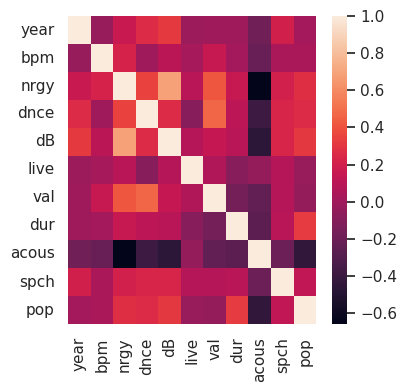

In [16]:
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(features.corr());

### Preprocessing

We will have to pre-process the features i.e. **Scale** the features (as some of the machine learning models are sensitive to scaling. e.g. SVM). Scaling adjusts the numbers to make it easy to compare the values that are out of each other's scope. To scale the data, we will use `StandardScaler` from `sklearn.preprocessing` module.

In [17]:
# scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Model Selection

As, we now have performed the data analysis and pre-processing, we need to choose models for our requirements. To choose models, we need to factor in some insights from our analysis thus far. We know that:

- Dataset is very small with skewed data distribution
- Target is multinomial with huge number of records
- Target distribution is not even (very much skewed)

Based on above information, the basic models we have opted for are

- SVM Classifier (SVC)
- Logistic Regression

### Support Vector Machines
In very simple terms, a **Support Vector Machine (SVM)** is a **supervised** machine learning model that tries to identity the largest possible decision boundary between classes. For multiclass classification problems, **One vs One** (OVO) or **One vs Rest** (OVR) methods can be used. SVMs are suitable for both linear and non-linear data. SVMs are sensitive to scaling and we have used `scaled_features` and `scaled_features_no_outliers` to train the model.

### Logistic Regression
A **Logistic Regression** model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. _Logistic model is used when the outcome is binary_. However, like SVM, Logistic Regression can be used with **OVO** or **OVR** approach for multinomial classification problems. 

As our data distribution is skewed, we will use `StratifiedKFold` to split the features and targets into folds and will ensure that each fold of dataset has the same proportion of observations with a given label.

In [22]:
def train_model(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return model,score

def split_train_model(skfold, scaler, model, features, target):
    scores = []
    for train_index, test_index in skfold.split(features, target):
        X_train,X_test = features.iloc[train_index,:], features.iloc[test_index,:]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)
        model, score = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
        scores.append(score)
    return model, scores

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

svm_classifier = SVC(C=0.01)
lr_classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
dt_classifier = DecisionTreeClassifier()

skfold = StratifiedKFold(n_splits=15)

for model in [svm_classifier, lr_classifier, dt_classifier]:
    model, scores = split_train_model(skfold, scaler, model, features, target) 
    print('Model {} mean accuracy score {}'.format(model, np.mean(scores)))

Model SVC(C=0.01) mean accuracy score 0.15517241379310345
Model OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)) mean accuracy score 0.32873563218390806
Model DecisionTreeClassifier() mean accuracy score 0.1710344827586207


With SVM, we got an accuracy score of 15%. Decision Tree yielded an accuracy of 18%. Logistic Regression model gave the best results so far i.e. 33% accuracy. These scores are very low. Primary reasons for such low accuracy scores could be

- Skewed data distribution 
- Very low number of records
- Too many classes

## Ensemble Learning

As none of our models worked really well individually, we can potentially use **Ensemble Learning**. Simply put, Ensemble Learning is when we put together multiple models and use them for producing the outcome. One of the easiest way to implement Ensemble Learning is to use **Random Forest** model. `RandomForestClassifier` is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter (if `bootstrap=True`), otherwise the whole dataset is used to build each tree.

Another way to implement **Ensemble Learning** is to use VotingClassifier with **hard** and **soft** voting. **HardVoting** is **majority voting** based on **equal** weights whereas **SoftVoting** is **majority voting** with weights based on model's confidence or **prediction probability**. 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=5)
skfold = StratifiedKFold(n_splits=15)
rf_classifier, scores = split_train_model(skfold, scaler, rf_classifier, features, target)
print('Random Forest Model {} mean accuracy score {}'.format(rf_classifier, np.mean(scores)))

Random Forest Model RandomForestClassifier(max_depth=5, n_estimators=1000) mean accuracy score 0.3400766283524905


In [26]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm', svm_classifier),('lr', lr_classifier),('dtree', dt_classifier),('rf', rf_classifier)]
voting_classifier = VotingClassifier(estimators, voting='hard')
voting_classifier, scores = split_train_model(skfold, scaler, voting_classifier, features, target)
print('VotingClassifier hard voting {} mean accuracy score {}'.format(voting_classifier, np.mean(scores)))

VotingClassifier hard voting VotingClassifier(estimators=[('svm', SVC(C=0.01)),
                             ('lr',
                              OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))),
                             ('dtree', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=1000))]) mean accuracy score 0.3265900383141762


With **Ensemble Learning** models as well, we couldn't see much improvement in the accuracy scores. Ensemble learning tries to boost the combined outcome of the models. As our models produced a low score individually, Ensemble learning brought out the best of all.

`RandomForestClassifier` model gave an accuracy of `~34%` while `VotingClassifier` produced an accuracy score of `~33%`. We can now try to do the `top genre` prediction for our test dataset. 

`CS98XClassificationTest.csv` contains 113 records and same features as our training dataset. Test dataset has no `top genre` column as this is our target variable. We used our best model i.e. `RandomForestClassifier` to predict the final `top genres` and submit the score to Kaggle. 

Upon submitting the score to kaggle, the score was `0.33928` and our ranking was `57` out of `78` teams This score is based on the `50%` of the dataset and the actual ranking and score might change when the competition ends.


In [27]:
test_data = pd.read_csv("/kaggle/input/cs9856-spotify-classification-problem-2023/CS98XClassificationTest.csv")
test_features = test_data.drop(['Id', 'title', 'artist'], axis = 1)

scaled_test_features = scaler.fit_transform(test_features)
y_pred = rf_classifier.predict(scaled_test_features)

submission = pd.DataFrame()
submission['Id'] = test_data['Id']
submission['top genre'] = y_pred
submission.to_csv('/kaggle/working/output.csv')


With this challenge, we got to work on an end-to-end Machine learning project. The main object of the challenge was to explore how a machine learning problem can be solved by following a series of steps. Data analysis, visualisation, feature engineering, model selection, model training and evaluation are the primary steps involved in solving any machine learning problem. 

While our machine learning models didn't provide a high score, considering the data size and uneven data distribution, the accuracy score wasn't terrible either. 

The next steps from our side could be to explore

- more sophisticated machine learning classification models
- tweaking hyper-parameters to make the best of basic models
- gathering more data to enable a better model training
- using deep learning to improve the model training